# What's the _point_?

*The ultimate goal of geom was to devise a method that would allow to compute the total area of multiple circles. The method would have to take into account that overlapping areas can only be included once. Some inspirational sources:*

* http://paulbourke.net/geometry/circlesphere/
* http://www.mathopenref.com/coordpolygonarea2.html
* http://www.benfrederickson.com/blog/
* http://stackoverflow.com (obviously)

--- 

### 1. What do we need?

In [1]:
import numpy as np
%matplotlib notebook
#from matplotlib import pyplot as plt, mpld3
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
from geom.circl import Point, Circle

### 2. What's a ccircle?

##### Introdcution

A Circle is a subclass of a Point which itself is a subclass of a numpy.ndarray. A Point is created by giving it x- and y-coordinates, while a Circle requires a supplementary radius parameter.

In [3]:
c1 = Circle([7,13,4])
c1 = c1-np.array([1,1,0])
c1

Circle([
 [ 6 12  4]
])

Let's make a simple plot of this circle and since we will be making more of these plots down the road, it might be a good idea to define the plot parameters in a function. To then make the plot we simply call the function and add a circle


In [4]:
def pltInit(xlim, ylim):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ### Spines parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ### Limits parameters
    ax.set_xlim([0, xlim])
    ax.set_ylim([0, ylim])
    ### Ticks parameters
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    plt.xticks(np.arange(0, xlim+1, 2.0))
    plt.yticks(np.arange(0, ylim+1, 2.0))
    ## Grid
    plt.grid(b=True, which='major', color='grey', linestyle='--')
    
    return fig, ax

In [5]:
fig, ax = pltInit(20,20)
cplot = plt.Circle((c1.x, c1.y), c1.r, color='blue', fill = False)
ax.add_artist(cplot)
plt.show()
#mpld3.display()

<IPython.core.display.Javascript object>

##### Getting the parameters and more creation

We can access the parameters with getters; Note that getting the x and y parameters at once also calls the superclass, the ppoint.

In [6]:
print(c1.x)
p1 = c1.xy
p2 = p1+np.array([4,0])
p2

[[6]]


Point([
    [10 12]
])

We can create a ppoint with multiple coordinates as well. Same goes for ccircles. Getting the xy coordinates (or any other parameter) follows the same logic as before.

In [7]:
c2 = Circle(np.append(p2,4))
c1_2 = Circle([c1,c2])
c1_2.xy

Point([
 [ 6 12]
 [10 12]
])

If we want to access a certain point within a ppoint or ccircle we can use normal indexing.

In [9]:
c1_2[1].xy

Point([
    [10 12]
])

### 3. What can it do?

##### Distance between circles

We can compute the distance between two circles...

In [10]:
c1.distance(c2)

array([[4.]])

... or take the distance between a circle and multiple circles

In [11]:
c3 = Circle([6,8,4])
c3.distance([c1_2])

array([[4.        ],
       [5.65685425]])

We can do it like this too:

In [12]:
c4 = Circle([10,8,4])
c1.distance([c2, c3, c4])

array([[4.        ],
       [4.        ],
       [5.65685425]])

##### Intersections between circles

For intersection points we follow a similar approach to the distance method (note that it again results in the superclass ppoint)

In [15]:
i1 = c1.intersect(c4)[0] # For the first intersection point
i2 = c1.intersect(c4)[1] # For the second intersection point
print(i1.distance(i2))

[[5.65685425]]


Let's plot all the intersection points between c1 and [c2,c3,c4]. *Supplementary intersecting circles can be added on-click!*

<IPython.core.display.Javascript object>


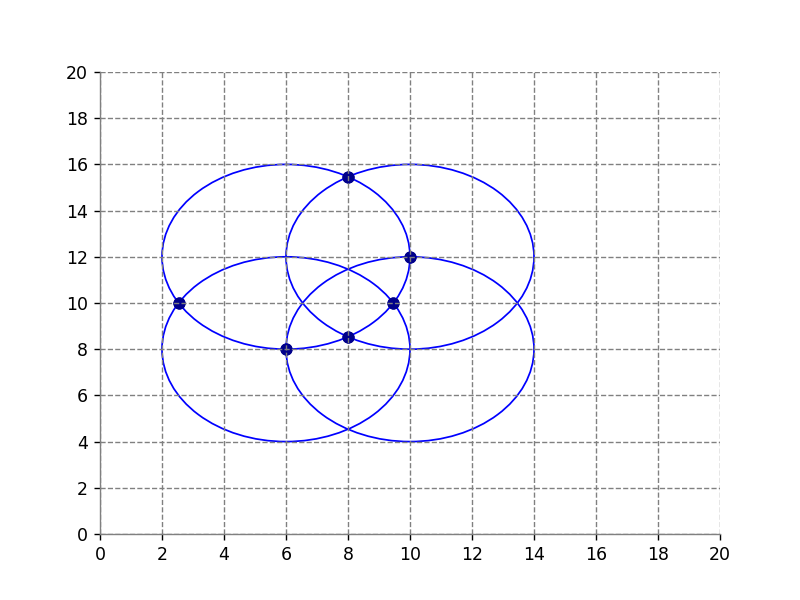

In [16]:
fig, ax = pltInit(20,20)
clist = [c1,c2,c3,c4]
for c in clist:
    cplot = plt.Circle((c.x, c.y), c.r, color='blue', fill = False)
    ax.add_artist(cplot)
    try: # c1.intersect(c1) will result in an OverflowEsrror
        i = c1.intersect(c)
        iplot = plt.scatter(i.x, i.y, color='darkblue')
        ax.add_artist(iplot)
    except:
        a = 1
        
def onclick(event):
    #plt.scatter(event.xdata, event.ydata)
    c = Circle([event.xdata, event.ydata, 2]) # Note: we take a standard radius
    cplot = plt.Circle((c.x, c.y), c.r, color='blue', fill = False)
    i = c1.intersect(c)
    iplot = plt.scatter(i.x, i.y, color='darkblue')
    ax.add_artist(iplot)
    ax.add_artist(cplot)
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()